In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
edmonds_karp_df = pd.read_csv('data/flow.csv')
dinic_df = pd.read_csv('data/dinic_flow.csv')

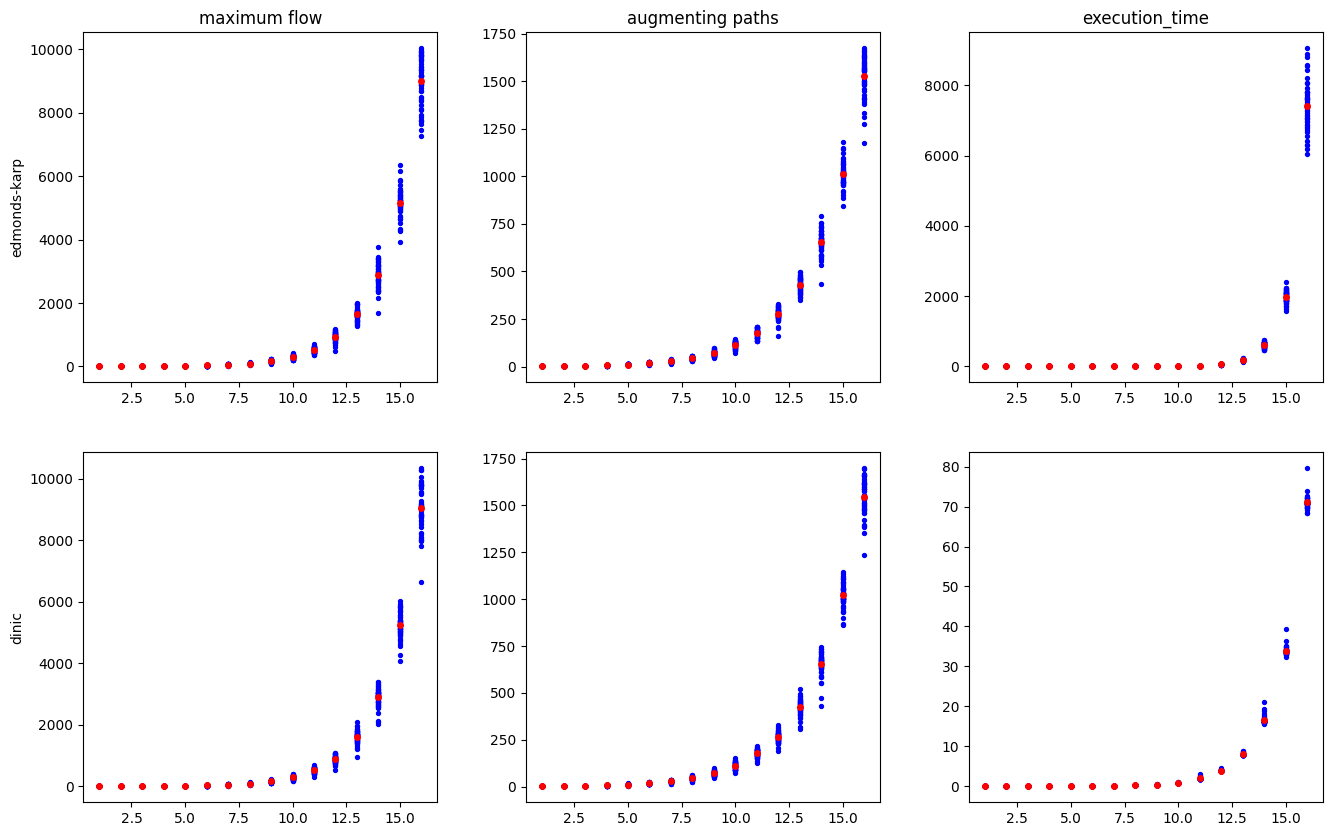

In [3]:
plt.figure(figsize=(16, 10))

axs = [
    plt.subplot2grid((2,3), (0,0), colspan=1, rowspan=1), 
    plt.subplot2grid((2,3), (0,1), colspan=1, rowspan=1),
    plt.subplot2grid((2,3), (0,2), colspan=1, rowspan=1),
    plt.subplot2grid((2,3), (1,0), colspan=1, rowspan=1), 
    plt.subplot2grid((2,3), (1,1), colspan=1, rowspan=1),
    plt.subplot2grid((2,3), (1,2), colspan=1, rowspan=1)
]
plt.subplots_adjust(hspace=0.2, wspace=0.25)

axs[0].set_title('maximum flow')
axs[1].set_title('augmenting paths')
axs[2].set_title('execution_time')

axs[0].set_ylabel('edmonds-karp')
axs[3].set_ylabel('dinic')

edmonds_karp_mean_df = pd.DataFrame(edmonds_karp_df.groupby(['size'], as_index=False).mean())
dinic_mean_df = pd.DataFrame(dinic_df.groupby(['size'], as_index=False).mean())

axs[0].scatter(edmonds_karp_df['size'], edmonds_karp_df['max_flow'], s=8, c='blue')
axs[0].scatter(edmonds_karp_mean_df['size'], edmonds_karp_mean_df['max_flow'], s=16, color='red')

axs[1].scatter(edmonds_karp_df['size'], edmonds_karp_df['augmenting_paths'], s=8, c='blue')
axs[1].scatter(edmonds_karp_mean_df['size'], edmonds_karp_mean_df['augmenting_paths'], s=16, color='red')

axs[2].scatter(edmonds_karp_df['size'], edmonds_karp_df['exec_time'], s=8, c='blue')
axs[2].scatter(edmonds_karp_mean_df['size'], edmonds_karp_mean_df['exec_time'], s=16, color='red')

axs[3].scatter(dinic_df['size'], dinic_df['max_flow'], s=8, c='blue')
axs[3].scatter(dinic_mean_df['size'], dinic_mean_df['max_flow'], s=16, color='red')

axs[4].scatter(dinic_df['size'], dinic_df['augmenting_paths'], s=8, c='blue')
axs[4].scatter(dinic_mean_df['size'], dinic_mean_df['augmenting_paths'], s=16, color='red')

axs[5].scatter(dinic_df['size'], dinic_df['exec_time'], s=8, c='blue')
axs[5].scatter(dinic_mean_df['size'], dinic_mean_df['exec_time'], s=16, color='red')

plt.show();

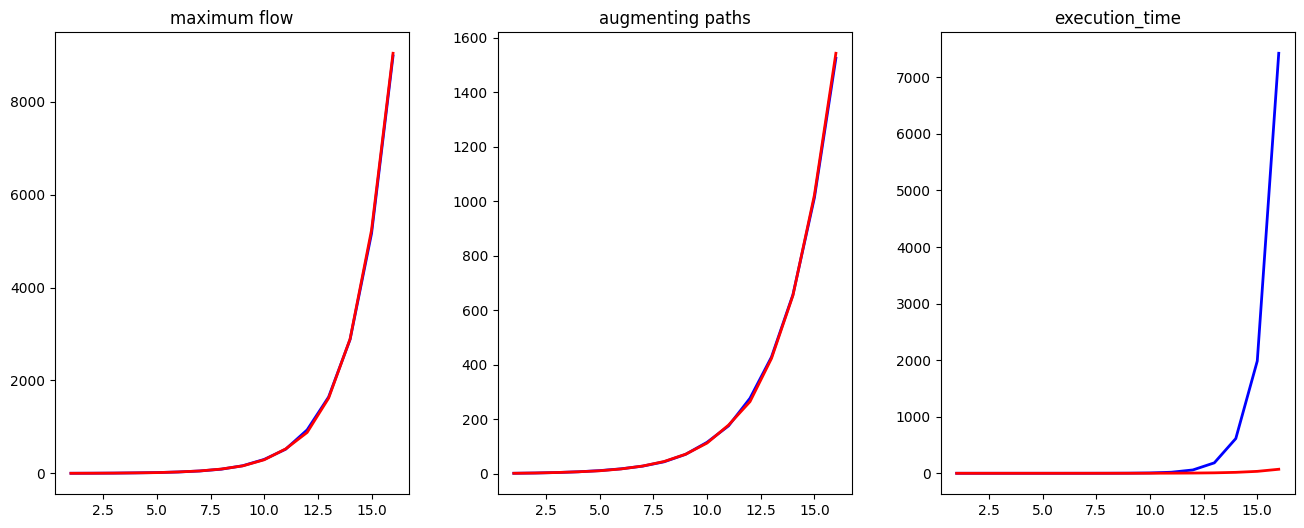

In [4]:
plt.figure(figsize=(16, 6))

axs = [
    plt.subplot2grid((1,3), (0,0), colspan=1, rowspan=1), 
    plt.subplot2grid((1,3), (0,1), colspan=1, rowspan=1),
    plt.subplot2grid((1,3), (0,2), colspan=1, rowspan=1)
]
plt.subplots_adjust(hspace=0.2, wspace=0.25)

axs[0].set_title('maximum flow')
axs[1].set_title('augmenting paths')
axs[2].set_title('execution_time')

edmonds_karp_mean_df = pd.DataFrame(edmonds_karp_df.groupby(['size'], as_index=False).mean())
dinic_mean_df = pd.DataFrame(dinic_df.groupby(['size'], as_index=False).mean())

axs[0].plot(edmonds_karp_mean_df['size'], edmonds_karp_mean_df['max_flow'], linewidth=2, c='blue', label='edmonds-karp')
axs[0].plot(dinic_mean_df['size'], dinic_mean_df['max_flow'], linewidth=2, color='red', label='dinic')

axs[1].plot(edmonds_karp_mean_df['size'], edmonds_karp_mean_df['augmenting_paths'], linewidth=2, c='blue', label='edmonds-karp')
axs[1].plot(dinic_mean_df['size'], dinic_mean_df['augmenting_paths'], linewidth=2, color='red', label='dinic')

axs[2].plot(edmonds_karp_mean_df['size'], edmonds_karp_mean_df['exec_time'], linewidth=2, c='blue', label='edmonds-karp')
axs[2].plot(dinic_mean_df['size'], dinic_mean_df['exec_time'], linewidth=2, color='red', label='dinic')

plt.show();

In [5]:
matchings_df = pd.read_csv('data/matchings.csv')
matchings_df

,size,degree,max_flow,augmenting_paths,max_matching,exec_time
0,3,1,8,8,8,0.0132
1,3,1,8,8,8,0.0127
2,3,1,8,8,8,0.0127
3,3,1,8,8,8,0.0118
4,3,1,8,8,8,0.0111
...,...,...,...,...,...,...
875,10,9,1024,1024,1024,27.0141
876,10,9,1024,1024,1024,26.8423
877,10,9,1024,1024,1024,28.8939
878,10,9,1024,1024,1024,30.0442


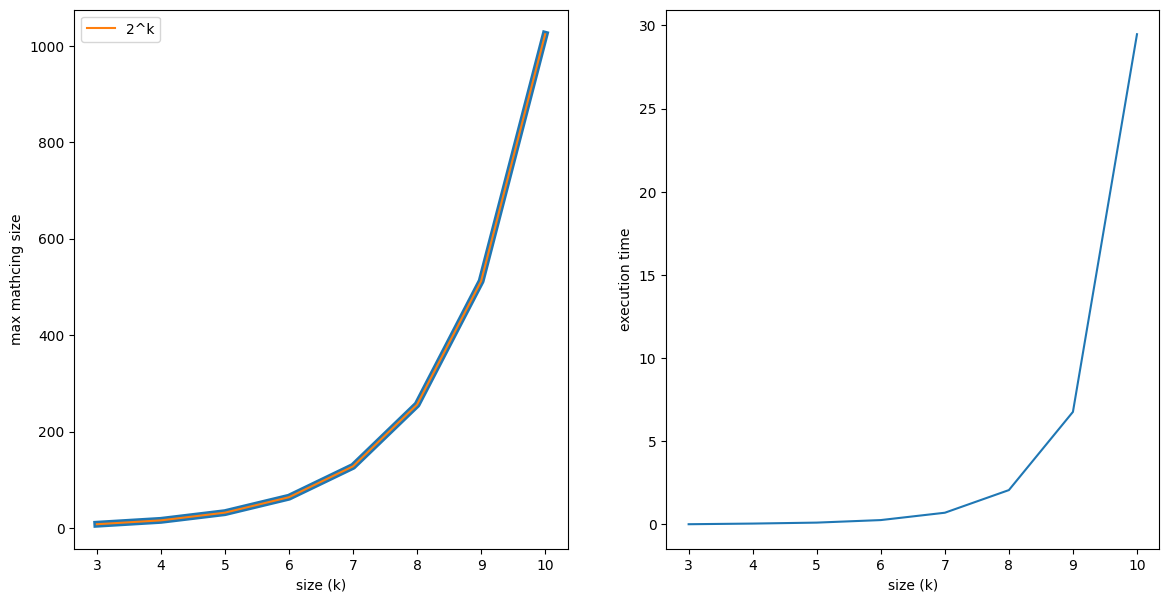

In [6]:
matchings_df = pd.read_csv('data/matchings.csv')
matchings_mean_df = pd.DataFrame(matchings_df.groupby('size', as_index=False).mean())

plt.figure(figsize=(14, 7))

axs = [
    plt.subplot2grid((1,2), (0,0), colspan=1, rowspan=1),
    plt.subplot2grid((1,2), (0,1), colspan=1, rowspan=1)
]

axs[0].set_xlabel('size (k)')
axs[0].set_ylabel('max mathcing size')
axs[0].plot(matchings_mean_df['size'], matchings_mean_df['max_matching'], linewidth=5)
axs[0].plot(matchings_mean_df['size'], np.power(2, matchings_mean_df['size']), label='2^k')
axs[0].legend()

axs[1].set_xlabel('size (k)')
axs[1].set_ylabel('execution time')
axs[1].plot(matchings_mean_df['size'], matchings_mean_df['exec_time'])

plt.show();